In [184]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Demographics Inofmation

In [185]:
demo_df = pd.read_excel("data/new/Demographic_Data.xls")  

## Product Details - Categories, Play types

In [186]:
product_cat_df = pd.read_excel("data/new/Product_details_from_BSS.xls")  

product_cat_df

,PRODUCT_LABEL.hash,CUSTOMER_REF.hash,ACCOUNT_NUM.hash,PRODUCT_SEQ,START_DAT,END_DAT,PRODUCT_ID.hash,PRODUCT_NAME,PRODUCT_STATUS,MEDIUM,CATEGORY,CATEGORY_DETAILS,TARIFF_ID.hash,TARIFF_NAME,TARIFF_DESC,RECURRING_CHARGE,
0,7b40c1d1c84c9a340004769491af7931,df4bc5da4eaaaab1d937c3fd2a699c3f,bd0cc5e96b24df6625fc68cbaf71b555,45595,2019-08-01,NaT,89885ff2c83a10305ee08bd507c1049c,AB_Copper Access Bearer,OK,MC,Double Play,VB,233d73b48e58f468c7ba79c07a84cbca,AB_Copper Access Bearer,AB_Copper Access Bearer,NaN,
1,7b40c1d1c84c9a340004769491af7931,df4bc5da4eaaaab1d937c3fd2a699c3f,bd0cc5e96b24df6625fc68cbaf71b555,45597,2019-08-01,NaT,aa486f25175cbdc3854151288a645c19,V_SLT Voice Service,OK,MC,Double Play,VB,8bb2c536d0fb580ce30b60ca38f773dd,z Sales End_.Office - Double Play,Office - Double Play,NaN,
2,15799aa2e9dcf19b945e3dbe3146f7dc,b30293458c6565bc283bac15b92aa38d,4c7a4769273c7a2eb4860a09f6376a70,40543,2018-08-01,NaT,aa486f25175cbdc3854151288a645c19,V_SLT Voice Service,OK,MC,Single Play-Voice,V,2bff3ec0941ed48576a06eed788fad54,z Sales End_.Office - Single Play,Office - Single Play,NaN,
3,15799aa2e9dcf19b945e3dbe3146f7dc,b30293458c6565bc283bac15b92aa38d,4c7a4769273c7a2eb4860a09f6376a70,40541,2018-08-01,NaT,89885ff2c83a10305ee08bd507c1049c,AB_Copper Access Bearer,OK,MC,Single Play-Voice,V,233d73b48e58f468c7ba79c07a84cbca,AB_Copper Access Bearer,AB_Copper Access Bearer,NaN,
4,a74c72a07e26ac631688df66f691255c,b30293458c6565bc283bac15b92aa38d,4c7a4769273c7a2eb4860a09f6376a70,40544,2018-08-01,NaT,89885ff2c83a10305ee08bd507c1049c,AB_Copper Access Bearer,OK,MC,Single Play-Voice,V,233d73b48e58f468c7ba79c07a84cbca,AB_Copper Access Bearer,AB_Copper Access Bearer,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60703,d41d8cd98f00b204e9800998ecf8427e,10cbb7cbabcfa7868a816f1f4f0187bb,dcab884afd6c1a13df78119714e9b76e,9886,2018-08-01,NaT,89885ff2c83a10305ee08bd507c1049c,AB_Copper Access Bearer,OK,NaN,NaN,NaN,233d73b48e58f468c7ba79c07a84cbca,AB_Copper Access Bearer,AB_Copper Access Bearer,NaN,
60704,d41d8cd98f00b204e9800998ecf8427e,e693d3caa5a46a8e8816e4115f298cf1,b0634522dd685230a5a7e559e906f5eb,38,2018-07-16,NaT,a368b0de8b91cfb3f91892fbf1ebd4b2,E_SLT PeoTV Service,OK,NaN,NaN,NaN,8bed24e4704ee937ecd84b814bc58b6a,Cu_PEO Uthayam,PEO Uthayam,690.0,
60705,d41d8cd98f00b204e9800998ecf8427e,51ee71e46ba64034adaf383345028fb8,949e14e85d36002ffb954d42d3366936,5696,2018-08-01,NaT,a368b0de8b91cfb3f91892fbf1ebd4b2,E_SLT PeoTV Service,OK,NaN,NaN,NaN,2a1d34135c9e8ef1c6f8d5078c51712a,Cu_Peo Silver,Cu_Peo Silver,899.0,
60706,d41d8cd98f00b204e9800998ecf8427e,10cbb7cbabcfa7868a816f1f4f0187bb,dcab884afd6c1a13df78119714e9b76e,9888,2019-03-12,NaT,aa486f25175cbdc3854151288a645c19,V_SLT Voice Service,OK,NaN,NaN,NaN,ff23707fd0625ccdfb4f42ddbaf1a649,z Sales End_Add. Line with SLT Phone,Additional Line with SLT Phone,NaN,


In [187]:
product_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60708 entries, 0 to 60707
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PRODUCT_LABEL.hash  60708 non-null  object        
 1   CUSTOMER_REF.hash   60708 non-null  object        
 2   ACCOUNT_NUM.hash    60708 non-null  object        
 3   PRODUCT_SEQ         60708 non-null  int64         
 4   START_DAT           60707 non-null  datetime64[ns]
 5   END_DAT             3292 non-null   datetime64[ns]
 6   PRODUCT_ID.hash     60708 non-null  object        
 7   PRODUCT_NAME        60707 non-null  object        
 8   PRODUCT_STATUS      60707 non-null  object        
 9   MEDIUM              60684 non-null  object        
 10  CATEGORY            60273 non-null  object        
 11  CATEGORY_DETAILS    60273 non-null  object        
 12  TARIFF_ID.hash      60708 non-null  object        
 13  TARIFF_NAME         60707 non-null  object    

## Phone No Account No Map

In [202]:
acc_no_map = product_cat_df[["PRODUCT_LABEL.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash"]]
acc_no_map.drop_duplicates(["PRODUCT_LABEL.hash"],inplace=True)
acc_no_map.rename(columns={'PRODUCT_LABEL.hash':'event_source.hash'}, inplace=True)
acc_no_map.reset_index(inplace=True)
acc_no_map.drop(["index"],axis=1,inplace=True)
acc_no_map

<ipython-input-202-cb3c55b3a8c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_no_map.drop_duplicates(["PRODUCT_LABEL.hash"],inplace=True)
/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash
0,7b40c1d1c84c9a340004769491af7931,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f
1,15799aa2e9dcf19b945e3dbe3146f7dc,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
2,a74c72a07e26ac631688df66f691255c,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
3,d67702262368f632f7014f1bd12d5444,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
4,53098ea32fbe12338600872be6e06fb0,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
...,...,...,...
27550,28938db617a935e0f092ae16667c9f37,06623c7ba64331f615ff83c5664b71bb,ac995f79a7164b89de084396352b343b
27551,d7515b0ed8141e075023da5947b714bf,06623c7ba64331f615ff83c5664b71bb,ac995f79a7164b89de084396352b343b
27552,919ba5f18ce708afcd4f545150021b0e,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f
27553,7ae240b62cca05b9ab0af678122e7e5c,8d8472d39b270801553f2d5e7c06fe22,f8743da5d0bff84f9440fb44fce1bdc1


In [203]:
acc_no_map.to_csv("data/new/account_no_map_reduced.csv")

## Adding Phone Number col to Customer Demographics 

In [204]:
phone_no_cust_ref = product_cat_df[["PRODUCT_LABEL.hash","CUSTOMER_REF.hash"]]

phone_no_cust_ref.drop_duplicates(["PRODUCT_LABEL.hash","CUSTOMER_REF.hash"], inplace=True)

<ipython-input-204-99d12708da7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phone_no_cust_ref.drop_duplicates(["PRODUCT_LABEL.hash","CUSTOMER_REF.hash"], inplace=True)


In [205]:
merged_demo = demo_df.merge(phone_no_cust_ref,how='left', on='CUSTOMER_REF.hash')
merged_demo.rename(columns={'PRODUCT_LABEL.hash':'event_source.hash'}, inplace=True)
merged_demo.reset_index(inplace=True)
merged_demo.drop(["index"],axis=1, inplace=True)
merged_demo

,CUSTOMER_REF.hash,GENDER,BIRTH_YEAR,AGE,,event_source.hash
0,a043dbaaa0025b1f8cc08824dc994a0d,M,1967,54,,a84f463df0fb45ec8d42ca92ab237156
1,a043dbaaa0025b1f8cc08824dc994a0d,M,1967,54,,174913a52c17beb0dad243cec5940c30
2,2e5e5c967af4b7b4c0cf0b9185d5ad7e,M,1964,57,,0bd313cd37f37a651cc0bda8feadc630
3,2e5e5c967af4b7b4c0cf0b9185d5ad7e,M,1964,57,,5b6deac8be1e07aabeb41a4158a08e71
4,3269bc892961919e511bdbe178fa0ac6,M,1966,55,,de4a1fdf1880db54d5176095a99ed2ab
...,...,...,...,...,...,...
4116,205b0fead79db9bf08a98002d2727ef5,M,1967,54,,8187113efb884778725f953c751ae4f1
4117,cd035ec55e44eea43d998addc7bcc434,M,1948,73,,90feabe2f2846cbf4eb77db650c48a1b
4118,f5fbbc6264cd75823c8f8cb0830cba45,F,1949,72,,7e2f7cef44ccac863691ec25019df475
4119,f5fbbc6264cd75823c8f8cb0830cba45,F,1949,72,,2324aebced3f63304a107e6e13c39f78


In [370]:
merged_demo.to_csv("data/user_profile/user_demographics_final.csv")

## VAS Common Dataset Analysis

In [230]:
vas_common_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_Rental.xls")
vas_common_df.rename(columns={'PRODUCT_NAME':'VAS','BSS_DSP':'Month_Subscribed','RENTAL':'Rental'}, inplace=True)

In [231]:
# Date correction
def date_correct_common(date):
    date=str(date)
    year=date[:4]
    month=date[5:7]
    return f"{year}-{month}"

In [232]:
vas_common_df["Month_Subscribed"]=vas_common_df["Month_Subscribed"].apply(lambda x: date_correct_common(x))

In [233]:
vas_common_df = vas_common_df.merge(acc_no_map,how='left',on="ACCOUNT_NUM.hash")

In [234]:
vas_common_df.drop_duplicates(["event_source.hash","VAS"], inplace=True,keep="last")
vas_common_df.reset_index(inplace=True)
vas_common_df.drop(["index"],axis=1, inplace=True)

In [235]:
vas_common_df = vas_common_df[["event_source.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash","VAS","Month_Subscribed","Rental"]]
vas_common_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,VAS,Month_Subscribed,Rental
0,e35d20e09689545309f1b77627419f2e,02059e815d999bda708149ae263946d3,45636ddd123db631d63e246c5d004400,BB_YouTube Bundle,2021-02,155
1,155e3c4f297149ac9ef77f3cfbe5e505,02059e815d999bda708149ae263946d3,45636ddd123db631d63e246c5d004400,BB_YouTube Bundle,2021-02,155
2,35361428d4c4195cdb0bb3a464354fcb,02059e815d999bda708149ae263946d3,45636ddd123db631d63e246c5d004400,BB_YouTube Bundle,2021-02,155
3,35b46b71deb4bd0453e898356853fce8,02059e815d999bda708149ae263946d3,45636ddd123db631d63e246c5d004400,BB_YouTube Bundle,2021-02,155
4,4fd1fbc526c121283d7da3b3f8b6759b,02059e815d999bda708149ae263946d3,45636ddd123db631d63e246c5d004400,BB_YouTube Bundle,2021-02,155
...,...,...,...,...,...,...
21762,40d37f19d98b8715bbff5213b5444700,a4025297136f28dce5916f32d1354d24,fcf4c4bf00e620cf688c142565a17b1e,BB_Messenger Bundle,2021-05,45
21763,374eaee71d041ae082536f875b1f019a,a4025297136f28dce5916f32d1354d24,fcf4c4bf00e620cf688c142565a17b1e,BB_Messenger Bundle,2021-05,45
21764,NaN,720d67e1d56b076413efbd52553c5388,NaN,V_Telehealth,2020-08,165
21765,NaN,8e7a582787f663d030bd2dc31e46ee49,NaN,FTTH_Gamer Lite Subscription,2021-04,500


In [237]:
vas_common_df["VAS"].value_counts()

BB_YouTube Bundle                   6040
P-Basic1_Tele Life                  4380
P_Sisu Connect                      3290
V_Sisu Connect                      3278
C_Sisu Connect                      2817
BB_ Entertainment Unlimited          716
BB_Messenger Bundle                  439
P-Plus1_Tele Life                    245
V-Basic1_TeleLife                    218
V-Plus1_TeleLife                     193
V_Telehealth                         117
P-Plus4_Tele Life                      9
V-Plus4_TeleLife                       8
P-Basic2_Tele Life                     4
C-Basic1_Tele Life                     3
V-Basic2_TeleLife                      3
V-Basic4_TeleLife                      2
P-Basic4_Tele Life                     2
2462                                   1
FTTH_Gamer Lite Subscription           1
Megaline_Gamer Lite Subscription       1
Name: VAS, dtype: int64

## VAS OTC Dataset Analysis

In [239]:
vas_otc_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_OTC.xls")  
vas_otc_df.rename(columns={'CREATED_DTM':'Month_Subscribed','OTC_MNY':'One_Time_Charge','OTC_NAME':'VAS'}, inplace=True)

In [240]:
vas_otc_df["Month_Subscribed"]=vas_otc_df["Month_Subscribed"].apply(lambda x: date_correct_common(x))

In [241]:
vas_otc_df = vas_otc_df.merge(acc_no_map,how='left',on="ACCOUNT_NUM.hash")

In [242]:
vas_otc_df.drop_duplicates(["ACCOUNT_NUM.hash","VAS"], inplace=True,keep="last")
vas_otc_df.reset_index(inplace=True)
vas_otc_df.drop(["index"],axis=1, inplace=True)

In [243]:
vas_otc_df = vas_otc_df[["event_source.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash","VAS","Month_Subscribed","One_Time_Charge"]]
vas_otc_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,VAS,Month_Subscribed,One_Time_Charge
0,b62e16b92a8c0bfda5123caa8541f2c4,7a4e5798abc9c9e314e4c6367da7e558,d872161bae33b29ab110e7b3e27ee71a,Meet Lite,2021-05,195
1,1301bbe6d521f89a821e6ca74d9aadd3,02059e815d999bda708149ae263946d3,45636ddd123db631d63e246c5d004400,Meet Lite,2021-06,195
2,fa4b7f2bf5551ec6fcd1a0aa4ca77426,83b2f83faba76ed481f026be3197caaa,b6bac1dbf3576d3030e58dc5cab1dba3,Meet Lite,2021-06,195
3,c2f6dbe906342b4c683d89b7c2cf5c2d,a3434e3a611ba69b233514072ad2eb79,2c4bbdc33f051df72d0809ba830c40fb,Meet Lite,2021-05,195
4,6aa589b1cdee431040af0f4f6e56f657,dbbb4011c6cc809850aa01f8ff5fe922,3fd3026756c47f2a4f721ce487d89a3c,Meet Lite,2021-06,195
...,...,...,...,...,...,...
425,5ced81bb6210eb65fcb8b17a14e281b8,61112729366efd09e3e609919f2054be,c29c0a17d2afb4d080ab004ed889d1e0,Meet Max,2021-01,490
426,5ced81bb6210eb65fcb8b17a14e281b8,61112729366efd09e3e609919f2054be,c29c0a17d2afb4d080ab004ed889d1e0,Meet Lite,2021-05,195
427,93cf0fab32a1e1b38a0a6c6e251e02d7,5ac9d5e02406067f6cc31d5436a5a8fb,75e9de7ac30154bcc87663a420a2f0c6,Meet Lite,2021-04,195
428,a8a3b2006a2fc841e31ee399389cf10d,4f1ed566c9476815cfe56eab1c22ed05,bd30a3e016ce2e64bb8f50bd70767ad7,Meet Lite,2021-06,195


In [244]:
vas_otc_df["VAS"].value_counts()

Meet Lite    358
Meet Max      65
Edu Lite       7
Name: VAS, dtype: int64

## BB VAS Dataset Analysis

In [269]:
vas_purchase_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_Costed_Events.xls")  
vas_purchase_df.drop_duplicates(["ACCOUNT_NUM.hash","PRODUCT","MM/YYYY"], inplace=True)
vas_purchase_df.rename(columns={'MM/YYYY':'Month_Subscribed','REV':'Rental','PRODUCT':'VAS'}, inplace=True)

In [270]:
vas_purchase_df

,ACCOUNT_NUM.hash,Month_Subscribed,Rental,VAS,
0,949e14e85d36002ffb954d42d3366936,2021-Apr-02 23:56:21,40.0,BB_Report Subscription Charge,
1,949e14e85d36002ffb954d42d3366936,2021-May-03 13:42:03,40.0,BB_Report Subscription Charge,
2,668291ed17c638aaed94f99f7fdf33a5,42017,250.0,BB EXTRA GB,
3,59322724d5029e5667d19ae164cdc16d,12018,750.0,BB EXTRA GB,
4,0e1fe0d01f3a2e9619999a1a634ec427,12018,1500.0,BB EXTRA GB,
...,...,...,...,...,...
2972,8d8472d39b270801553f2d5e7c06fe22,2021-Mar-03 03:42:49,40.0,BB_Report Subscription Charge,
2973,6f5a50d14f88a8bbed200d30e65ddf20,32020,3400.0,BB EXTRA GB,
2974,8d8472d39b270801553f2d5e7c06fe22,2021-Mar-03 00:28:02,40.0,BB_Report Subscription Charge,
2975,2ea6c5e59c02744c036fe8ff6cccfb7c,52019,1050.0,BB EXTRA GB,


In [271]:
# Date correction
def date_correct_bb(date):
    if len(date)==5:
        month = "0" + date[0]
        year = date[1:]
    if len(date)==6:
        month=date[:2]
        year=date[2:]
    if len(date)>6:
        year=date[:4]
        month=date[9:11]
    return f"{year}-{month}"

In [272]:
# test
print(date_correct("32020"))
print(date_correct("102017"))
print(date_correct("2021-May-02 08:02:23"))

2020-03
2017-10
2021-02


In [274]:
vas_purchase_df["Month_Subscribed"]=vas_purchase_df["Month_Subscribed"].apply(lambda x: date_correct_bb(x))

In [275]:
vas_purchase_df = vas_purchase_df.merge(acc_no_map,how='left',on="ACCOUNT_NUM.hash")
vas_purchase_df.drop_duplicates(["ACCOUNT_NUM.hash","VAS","Month_Subscribed"], inplace=True,keep="last")

In [277]:
vas_purchase_df = vas_purchase_df[["event_source.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash","VAS","Month_Subscribed","Rental"]]

In [278]:
vas_purchase_df["VAS"].value_counts()

BB EXTRA GB                      2267
BB_Report Subscription Charge     161
BB Personal Storage               112
Name: VAS, dtype: int64

### Extra GB Usage

In [280]:
extra_GB_df= vas_purchase_df[(vas_purchase_df["VAS"]=="BB EXTRA GB")]
extra_GB_df.reset_index(inplace=True)
extra_GB_df.drop(["index"],axis=1,inplace=True)
extra_GB_df

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,VAS,Month_Subscribed,Rental
0,154adca91f53bf8af4618544147bdab9,668291ed17c638aaed94f99f7fdf33a5,6100520dec9c009ee526b1c518626349,BB EXTRA GB,2017-04,250.0
1,d285cd403f0bcedf0072777ef9a724d7,59322724d5029e5667d19ae164cdc16d,efeab37d377b0f32b7f70b159f824652,BB EXTRA GB,2018-01,750.0
2,2e9071894a55e63338baaf062b9f2ae7,0e1fe0d01f3a2e9619999a1a634ec427,cd3b840fb0da1abcc5bfdebaca6cd761,BB EXTRA GB,2018-01,1500.0
3,5693fe3496dd2588d52cabe07469af1f,0e3e3cabb8b653645ad4268f318a80b8,ea80ab897faee5c372d67f28e5b47c54,BB EXTRA GB,2017-08,750.0
4,95d08da5227bc513d6c3433a51b68c5c,130a75d8233d72dc5dce070522818bea,dd9255113bd2889330fd040a0b3f2a6c,BB EXTRA GB,2020-06,850.0
...,...,...,...,...,...,...
2262,56be2e09143276313dd9b3bc9898f915,9b711e39affb4e5a7a364787253d4c09,624abba7ba601dea285a759b2c284965,BB EXTRA GB,2020-05,3000.0
2263,fa4b7f2bf5551ec6fcd1a0aa4ca77426,83b2f83faba76ed481f026be3197caaa,b6bac1dbf3576d3030e58dc5cab1dba3,BB EXTRA GB,2020-03,850.0
2264,b297e76d28de5a7c47e6841bcb1fb371,6c4e0622eabb0cd72da7dee9ac9e1996,3671aef12aa20d351d9e11f01ad0c956,BB EXTRA GB,2020-05,3585.0
2265,dae260cdb5f4b4ac637c62e7f378bf05,6f5a50d14f88a8bbed200d30e65ddf20,56bcfc6b190063f24de1a57267a8054c,BB EXTRA GB,2020-03,3400.0


In [281]:
extra_GB_df.to_csv("data/new/BB_extra_GB_usage.csv")

#### Extra GB Usage pivot matrix

In [282]:
extra_GB_pivot_df = pd.pivot_table(extra_GB_df[["event_source.hash","Month_Subscribed","Rental"]],index=['event_source.hash'],columns=['Month_Subscribed'], aggfunc=np.sum, fill_value=0)

In [283]:
extra_GB_pivot_df

Rental                                  \
Month_Subscribed                 2013-01 2013-02 2013-03 2013-04 2013-05   
event_source.hash                                                          
00768613dcde5cd5723a25a7234b9a9f       0       0       0       0       0   
01e39b3168624dbab960441ada2e20bf       0       0       0       0       0   
02e1927126eb0391bc6fb78113ea5525       0       0       0       0       0   
032473256f92e58743c646b84e89bf4b       0       0       0       0       0   
0337f10cd6d707ca500d10a3ac3c2736       0       0       0       0       0   
...                                  ...     ...     ...     ...     ...   
fa4b7f2bf5551ec6fcd1a0aa4ca77426       0       0       0       0       0   
fb492dec013ea61013ac6d85897b0f19       0       0       0       0       0   
fbfeb5f9c94ceed16035be418aadb06c       0       0       0       0       0   
fd4e6131d35294db04e27fae958c0dd2       0       0       0       0       0   
fdfaf5fa5700c3f377d21a6ceddeef0c       0       0       0       0       0   

                                                                          ...  \
Month_Subscribed                 2013-06 2013-07 2015-09 2015-10 2015-11  ...   
event_source.hash                                                         ...   
00768613dcde5cd5723a25a7234b9a9f       0       0       0       0       0  ...   
01e39b3168624dbab960441ada2e20bf       0       0       0       0       0  ...   
02e1927126eb0391bc6fb78113ea5525       0       0       0       0       0  ...   
032473256f92e58743c646b84e89bf4b       0       0       0       0       0  ...   
0337f10cd6d707ca500d10a3ac3c2736       0       0       0       0       0  ...   
...                                  ...     ...     ...     ...     ...  ...   
fa4b7f2bf5551ec6fcd1a0aa4ca77426       0       0       0       0       0  ...   
fb492dec013ea61013ac6d85897b0f19       0       0       0       0       0  ...   
fbfeb5f9c94ceed16035be418aadb06c       0       0       0       0       0  ...   
fd4e6131d35294db04e27fae958c0dd2       0       0    3000    1000    1500  ...   
fdfaf5fa5700c3f377d21a6ceddeef0c       0       0       0       0       0  ...   

                                                                          \
Month_Subscribed                 2019-10 2019-11 2019-12 2020-01 2020-02   
event_source.hash                                                          
00768613dcde5cd5723a25a7234b9a9f       0       0       0       0       0   
01e39b3168624dbab960441ada2e20bf       0       0     850       0       0   
02e1927126eb0391bc6fb78113ea5525    1875       0       0       0       0   
032473256f92e58743c646b84e89bf4b       0       0       0       0       0   
0337f10cd6d707ca500d10a3ac3c2736       0       0       0       0       0   
...                                  ...     ...     ...     ...     ...   
fa4b7f2bf5551ec6fcd1a0aa4ca77426       0       0       0       0       0   
fb492dec013ea61013ac6d85897b0f19       0       0       0       0       0   
fbfeb5f9c94ceed16035be418aadb06c     500     500     425       0     200   
fd4e6131d35294db04e27fae958c0dd2       0     525       0       0       0   
fdfaf5fa5700c3f377d21a6ceddeef0c       0       0       0       0       0   

                                                                          
Month_Subscribed                 2020-03 2020-04 2020-05 2020-06 2020-07  
event_source.hash                                                         
00768613dcde5cd5723a25a7234b9a9f       0       0       0       0       0  
01e39b3168624dbab960441ada2e20bf       0     200    1925    2775    2350  
02e1927126eb0391bc6fb78113ea5525    1700    1275    2350    1500    2125  
032473256f92e58743c646b84e89bf4b       0       0       0    1500    1500  
0337f10cd6d707ca500d10a3ac3c2736       0       0       0       0       0  
...                                  ...     ...     ...     ...     ...  
fa4b7f2bf5551ec6fcd1a0aa4ca77426     850     200     425       0       0  
fb492dec013ea61013a

In [284]:
extra_GB_pivot_df.to_csv("data/new/BB_extra_GB_usage_pivot.csv")

#### Insights
- 314 Unique customers - extra GB purchases in moths vary from 2013-2020

### Other BB VAS

In [285]:
bb_vas_df= vas_purchase_df[(vas_purchase_df["VAS"]!="BB EXTRA GB")]
bb_vas_df.reset_index(inplace=True)
bb_vas_df.drop(["index"],axis=1,inplace=True)
bb_vas_df

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,VAS,Month_Subscribed,Rental
0,4d4543b0adead7d90996b7108ba5b9f5,b027d65390a0c725b9ce41e409f9797e,f915b183884f8197b358c9638584531c,BB_Report Subscription Charge,2021-03,40.0
1,9b926391a08ef2e505ec4a950e48cb29,954b260034de32a9b8e1a1f164a65e0a,7822366a7fa95fb69d699a511aec9232,BB_Report Subscription Charge,2021-03,40.0
2,71afaddb9d453efa0b7ef86df18b4588,0fa1d2aeb386d52b8fb4b545f3d28b5d,1e108ee6766364edc543458ce876462f,BB_Report Subscription Charge,2020-02,40.0
3,71afaddb9d453efa0b7ef86df18b4588,0fa1d2aeb386d52b8fb4b545f3d28b5d,1e108ee6766364edc543458ce876462f,BB_Report Subscription Charge,2021-01,40.0
4,1e4e319dbece0eb55b3770e302e5d371,d6ac58a33580a04f7c8f98e23c0952a8,ad0bba44c9629a3e5e89a421c4bc5213,BB_Report Subscription Charge,2021-01,40.0
...,...,...,...,...,...,...
268,7ae240b62cca05b9ab0af678122e7e5c,8d8472d39b270801553f2d5e7c06fe22,f8743da5d0bff84f9440fb44fce1bdc1,BB_Report Subscription Charge,2020-03,40.0
269,7ae240b62cca05b9ab0af678122e7e5c,8d8472d39b270801553f2d5e7c06fe22,f8743da5d0bff84f9440fb44fce1bdc1,BB_Report Subscription Charge,2020-02,40.0
270,7ae240b62cca05b9ab0af678122e7e5c,8d8472d39b270801553f2d5e7c06fe22,f8743da5d0bff84f9440fb44fce1bdc1,BB_Report Subscription Charge,2021-02,40.0
271,7ae240b62cca05b9ab0af678122e7e5c,8d8472d39b270801553f2d5e7c06fe22,f8743da5d0bff84f9440fb44fce1bdc1,BB_Report Subscription Charge,2021-03,40.0


## VAS DWH Dataset Analysis

In [257]:
vas_DWH_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_SLT_DWH.xls")  
vas_DWH_df.rename(columns={'ACCOUNT_NO.hash':'ACCOUNT_NUM.hash','REPORTING_MONTH_CAL_MONTH_CODE':'Month_Subscribed','CODE_DESC':'VAS','REVENUE_AMOUNT':'Rental'}, inplace=True)

In [258]:
# Date correction
def date_correct_dwh(date):
    date=str(date)
    year=date[:4]
    month=date[4:7]
    return f"{year}-{month}"

In [259]:
vas_DWH_df["Month_Subscribed"]=vas_DWH_df["Month_Subscribed"].apply(lambda x: date_correct_dwh(x))

In [260]:
vas_DWH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  578 non-null    object
 1   Month_Subscribed  578 non-null    object
 2   VAS               578 non-null    object
 3   Rental            578 non-null    int64 
 4                     578 non-null    object
dtypes: int64(1), object(4)
memory usage: 22.7+ KB


In [261]:
vas_DWH_df = vas_DWH_df.merge(acc_no_map,how='left',on="ACCOUNT_NUM.hash")
vas_DWH_df.drop_duplicates(["ACCOUNT_NUM.hash","VAS"],inplace=True)
vas_DWH_df.reset_index(inplace=True)
vas_DWH_df.drop(["index"],axis=1,inplace=True)

In [262]:
vas_DWH_df = vas_DWH_df[["event_source.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash","VAS","Month_Subscribed","Rental"]]
vas_DWH_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,VAS,Month_Subscribed,Rental
0,17ef97208c9f55550e39b74496f7b381,204773567701102c4acf8fda9eaccfdd,d342cf1db6cf1710dc101922d0387459,PEO TV GO_OTT_A-la carte channels,2020-05,100
1,e6a1038461059eb02d1c245e643a1ddb,52e7c04d12cb33c77031760584a9586e,cc9cde6ff7e8a085c9bdcd5d870e3624,PEO TV GO_OTT_A-la carte channels,2020-06,100
2,20a36ea2b36090f4a0cdd2f562bc9ba3,9d2f5d0f09198069413924db9a10d1c3,8c81f7e771386cc28240a6804a3733fb,PEO TV GO_OTT_A-la carte channels,2019-09,100
3,c5e4c82139eb50e0742223947e880882,52b1c4fc5583a0b8449029dc92eeae45,eae1da6d914fee5809b07a0536bf93ca,PEO TV GO_OTT_A-la carte channels,2020-02,100
4,5bd67e3d7bb2e515b844efd13b420ca4,2b60f8ffb99f7932ee00cdd291fb1dd5,1e18e8301408434bc3320d0db9f7d17e,PEO TV GO_OTT_A-la carte channels,2020-07,100
...,...,...,...,...,...,...
56,16d9c308f2af512eb10bac235f3e1157,4e30072320e0cc5102516ac0f83dac32,a06652541020386adc4ed01e228fcd7b,Package Rental Through ADSL,2020-07,199
57,fac10d80716bbf349984d6be2edd27f9,3dec6cac91d5d018e8286e9e8311cd97,622054b996812991195d634f013c40fb,Package Rental Through ADSL,2019-05,199
58,6ae9d45f81204b111268a83e532c066b,9324793d25ea7ec770a033120d4d2254,e7785d8342773d2c3854e1446732cdf6,Package Rental Through ADSL,2018-12,149
59,552d18e8515f81cf52f85d1cb995de16,50cf8d74511fd6337cbef6cd5f8fb12d,77bdb4ff769d4a633257ab281e440650,Package Rental Through ADSL,2020-01,199


In [263]:
vas_DWH_df["VAS"].value_counts()

PEO TV GO_OTT_A-la carte channels    49
Package Rental Through ADSL           6
PeoTVGo_Channel Package               4
BB_PeoTVGO Revenue code               2
Name: VAS, dtype: int64

## Product Sate Changes DF

In [328]:
state_changes_df = pd.read_csv("data/Product State Changes from BSS.csv")

In [329]:
state_changes_df = state_changes_df.drop(['PRODUCT_LABEL','CUSTOMER_REF','ACCOUNT_NUM' ,'PRODUCT_STATUS','PRODUCT_ID','START_DAT','END_DAT','PRODUCT_SEQ'], axis=1)
state_changes_df.rename(columns={'PRODUCT_LABEL.hash': 'event_source.hash','PRODUCT_NAME':'VAS','EFFECTIVE_DTM':'Month_Subscribed'}, inplace=True)

In [330]:
month_map = {"Jan":"01","Feb":"02","Mar":"03","Apr":"04","May":"05","Jun":"06","Jul":"07","Aug":"08","Sep":"09","Oct":"10","Nov":"11","Dec":"12"}

In [331]:
# Date correction
def date_correct_psc(date):
    date=str(date)
    year=date[:4]
    mnt_temp= date[5:8]
    month=[v for k, v in month_map.items() if mnt_temp in k][0]
    return f"{year}-{month}"

In [332]:
# check
print(date_correct_psc('2019-Jul-01 00:00:00'))
print(date_correct_psc('2019-May-10 11:55:26'))

2019-07
2019-05


In [333]:
state_changes_df["Month_Subscribed"]=state_changes_df["Month_Subscribed"].apply(lambda x: date_correct_psc(x))

In [334]:
state_changes_df = state_changes_df[["event_source.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash","VAS","Month_Subscribed"]]
state_changes_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,VAS,Month_Subscribed
0,b635fc31617ffc9c1e6b5015fb32e108,a4e4afaedb57f205bfeff624c39fe49d,3bab8adf192d3b98fc879ad65bf3b1a8,V_Single VAS Bundle,2019-06
1,ef74b1171331411a4d2e9fada9158215,9c802b6b329dc1e3ba6e6c655a21e65d,395dd9f2747c6fa4336ee794b1cb6d72,E_Referral offer Discount,2020-01
2,31110bf10f07e3d5e23da9680b1dd287,1cf3f313f1060c69dfe814a0e8124f18,f72dffa8e0e57e2999859d05fb470b8e,V_Absentee service,2019-10
3,b6404a24d0ae0f5dbb11c78c783bd1fc,ce8d936fed762bfa12912fb18915b802,71a467201a2d56926e6f9e3b162635a5,V_Hotline Service,2019-06
4,b635fc31617ffc9c1e6b5015fb32e108,a4e4afaedb57f205bfeff624c39fe49d,3bab8adf192d3b98fc879ad65bf3b1a8,V_Caller Line Identification,2019-06
...,...,...,...,...,...
3023,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,197991049d40e712d4471da75fade116,V_DQ Contact Details,2019-04
3024,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,197991049d40e712d4471da75fade116,AB_Megaline,2019-04
3025,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,197991049d40e712d4471da75fade116,AB_Megaline Startup,2019-04
3026,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,197991049d40e712d4471da75fade116,V_IDD,2019-04


## VAS Dataframes Merging

In [322]:
# Concat dataframes and merge by event_source.hash
vas_final_df = pd.concat([vas_common_df, vas_otc_df, bb_vas_df, vas_DWH_df,state_changes_df], ignore_index=True)

In [323]:
vas_final_df.sort_values('Month_Subscribed',inplace=True)

In [324]:
vas_final_df.reset_index(inplace=True)
vas_final_df.drop(["index"],axis=1,inplace=True)

In [325]:
vas_final_df.drop_duplicates(["event_source.hash","VAS"],inplace=True,keep="last")

In [326]:
vas_final_df = vas_final_df[vas_final_df['event_source.hash'].notna()]

In [327]:
vas_final_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,VAS,Month_Subscribed,Rental,One_Time_Charge
0,cb8c74ddd4a63d4be6863c728d192bbb,38a6ebff001c58fc9531d4fa45e53d20,2afaee80883e0d27456a56cf1df362c4,P-Basic1_Tele Life,2005-12,60,NaN
1,f1e6ea1c5ce03ece5269055d6a405d50,38a6ebff001c58fc9531d4fa45e53d20,2afaee80883e0d27456a56cf1df362c4,P-Basic1_Tele Life,2005-12,60,NaN
2,f5d0887e842c1c62ae8d7f86be251c1a,7187391b66100468034c6a404568e258,11d75653801c7aa0f19b1c190c76b225,P-Basic1_Tele Life,2007-09,60,NaN
3,f1c1d351b3ec03eddfa07f8fb1ed00a4,b7fd2db033ac656d6c5597299e2df4dd,3230646fc7b04b13e30c1bf916a2c27f,P-Basic1_Tele Life,2007-09,60,NaN
4,d5b0f9136ec72d6fff91852156a9c596,270ce57b6e5e6247e9318c361e1f74ee,a2b2fc40e50a74a4d00af4e5c6437493,P-Basic1_Tele Life,2007-10,60,NaN
...,...,...,...,...,...,...,...
25553,8eb331012e734d80ff7d4448f34b5a8a,83041b23b6ad1c70326076d1210fa761,ac995f79a7164b89de084396352b343b,BB_Report Subscription Charge,2021-23,40,NaN
25554,390c6045803d1ed237954529c0fe81a1,d54af3961d00eb3e721ce7cc7574e4b4,19a92b49f733c4ece2ff7278a565c139,BB_Report Subscription Charge,2021-24,40,NaN
25555,1e4e319dbece0eb55b3770e302e5d371,d6ac58a33580a04f7c8f98e23c0952a8,ad0bba44c9629a3e5e89a421c4bc5213,BB_Report Subscription Charge,2021-24,40,NaN
25556,415bca68b4dbcdb747830d0c34136acb,656462687d62cea968dc32c0c6d28a70,de1df3e229f804331db2e1937af635db,BB Personal Storage,2021-28,5.36,NaN


In [335]:
vas_final_df["VAS"].value_counts()

BB_YouTube Bundle            6039
P-Basic1_Tele Life           4379
P_Sisu Connect               3289
V_Sisu Connect               3277
C_Sisu Connect               2816
                             ... 
V_One-Time Detailed Bill        1
V_Voice Startup Fee             1
P_Call park                     1
V_Call Barring                  1
P_Call Forwarding Offline       1
Name: VAS, Length: 120, dtype: int64

In [340]:
def vas_bucketizer(vas):
    if "V_" in vas or "V-" in vas:
        category="Voice"
    elif "Peo" in vas or "PEO" in vas:
        category="PeoTV"
    elif "BB" in vas:
        category="BB"
    else:
        category="Other"
    return category

In [341]:
vas_final_df["VAS_Type"]=vas_final_df["VAS"].apply(lambda x: vas_bucketizer(x))

In [342]:
vas_final_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,VAS,Month_Subscribed,Rental,One_Time_Charge,VAS_Type
0,cb8c74ddd4a63d4be6863c728d192bbb,38a6ebff001c58fc9531d4fa45e53d20,2afaee80883e0d27456a56cf1df362c4,P-Basic1_Tele Life,2005-12,60,NaN,Other
1,f1e6ea1c5ce03ece5269055d6a405d50,38a6ebff001c58fc9531d4fa45e53d20,2afaee80883e0d27456a56cf1df362c4,P-Basic1_Tele Life,2005-12,60,NaN,Other
2,f5d0887e842c1c62ae8d7f86be251c1a,7187391b66100468034c6a404568e258,11d75653801c7aa0f19b1c190c76b225,P-Basic1_Tele Life,2007-09,60,NaN,Other
3,f1c1d351b3ec03eddfa07f8fb1ed00a4,b7fd2db033ac656d6c5597299e2df4dd,3230646fc7b04b13e30c1bf916a2c27f,P-Basic1_Tele Life,2007-09,60,NaN,Other
4,d5b0f9136ec72d6fff91852156a9c596,270ce57b6e5e6247e9318c361e1f74ee,a2b2fc40e50a74a4d00af4e5c6437493,P-Basic1_Tele Life,2007-10,60,NaN,Other
...,...,...,...,...,...,...,...,...
25553,8eb331012e734d80ff7d4448f34b5a8a,83041b23b6ad1c70326076d1210fa761,ac995f79a7164b89de084396352b343b,BB_Report Subscription Charge,2021-23,40,NaN,BB
25554,390c6045803d1ed237954529c0fe81a1,d54af3961d00eb3e721ce7cc7574e4b4,19a92b49f733c4ece2ff7278a565c139,BB_Report Subscription Charge,2021-24,40,NaN,BB
25555,1e4e319dbece0eb55b3770e302e5d371,d6ac58a33580a04f7c8f98e23c0952a8,ad0bba44c9629a3e5e89a421c4bc5213,BB_Report Subscription Charge,2021-24,40,NaN,BB
25556,415bca68b4dbcdb747830d0c34136acb,656462687d62cea968dc32c0c6d28a70,de1df3e229f804331db2e1937af635db,BB Personal Storage,2021-28,5.36,NaN,BB


In [346]:
vas_final_df[["VAS","VAS_Type"]].value_counts()

VAS                                       VAS_Type
BB_YouTube Bundle                         BB          6039
P-Basic1_Tele Life                        Other       4379
P_Sisu Connect                            Other       3289
V_Sisu Connect                            Voice       3277
C_Sisu Connect                            Other       2816
                                                      ... 
P_Call Forwarding Offline                 Other          1
P_CLI presentation in call waiting        Other          1
P_Anonymous call barring                  Other          1
P_Additional features -Double VAS Bundle  Other          1
V_Voice Startup Fee                       Voice          1
Length: 120, dtype: int64

In [348]:
vas_final_df.to_csv("data/user_profile/VAS_Final_list.csv")

<AxesSubplot:>

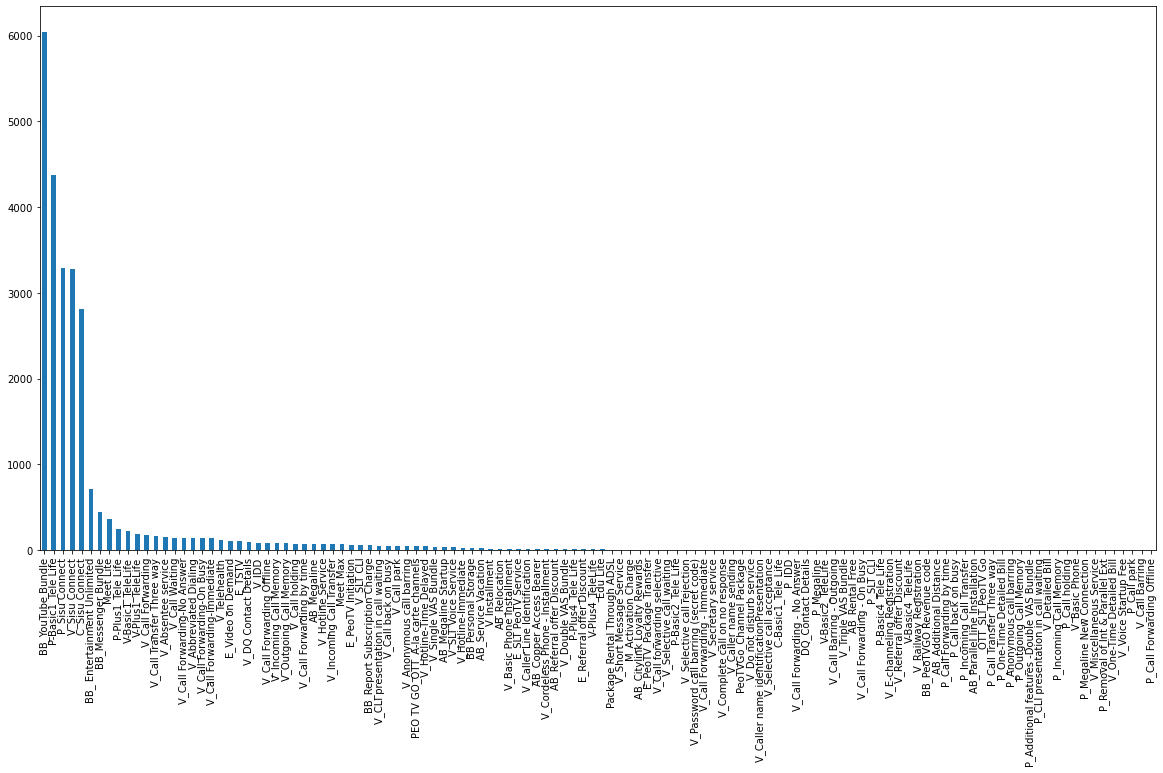

In [369]:
vas_final_df["VAS"].value_counts().plot(kind="bar", figsize=(20,10))

## Exporting VAS names list

In [350]:
vas_list = vas_final_df['VAS'].unique()
vas_list_df = pd.DataFrame({"VAS":vas_list })
vas_list_df

,VAS
0,P-Basic1_Tele Life
1,V-Plus4_TeleLife
2,V-Plus1_TeleLife
3,V-Basic1_TeleLife
4,P-Plus1_Tele Life
...,...
115,Meet Max
116,Edu Lite
117,BB_YouTube Bundle
118,BB_Messenger Bundle


In [352]:
vas_list_df.to_csv("data/user_profile/VAS_List.csv")

## Exporting VAS aggregated DataFrame

In [361]:
vas_final_df.isnull().sum(axis=0)

event_source.hash        0
ACCOUNT_NUM.hash         0
CUSTOMER_REF.hash        0
VAS                      0
Month_Subscribed         0
Rental                3411
One_Time_Charge      24876
VAS_Type                 0
VAS_Count                0
dtype: int64

In [362]:
vas_agg_df = vas_final_df
vas_agg_df["VAS_Count"] = 1

In [363]:
vas_agg_df = vas_agg_df.groupby('event_source.hash', as_index=False).agg(list)

In [364]:
vas_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10486 entries, 0 to 10485
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  10486 non-null  object
 1   ACCOUNT_NUM.hash   10486 non-null  object
 2   CUSTOMER_REF.hash  10486 non-null  object
 3   VAS                10486 non-null  object
 4   Month_Subscribed   10486 non-null  object
 5   Rental             10486 non-null  object
 6   One_Time_Charge    10486 non-null  object
 7   VAS_Type           10486 non-null  object
 8   VAS_Count          10486 non-null  object
dtypes: object(9)
memory usage: 819.2+ KB


In [365]:
vas_agg_df["ACCOUNT_NUM.hash"]= vas_agg_df["ACCOUNT_NUM.hash"].apply(lambda x: x[0])
vas_agg_df["CUSTOMER_REF.hash"]= vas_agg_df["CUSTOMER_REF.hash"].apply(lambda x: x[0])
vas_agg_df['VAS_Count'] = vas_agg_df.apply(lambda x: len(x['VAS_Count']), axis=1)
vas_agg_df.drop(["Month_Subscribed","Rental","One_Time_Charge"],axis=1, inplace=True)
vas_agg_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,VAS,VAS_Type,VAS_Count
0,00099ff6e175f2b49e7067b20d69e4c3,6b4bfa1e32f513071c6b138a86c3bac9,0552174bba6950523aa45450f6690d02,"[P_Sisu Connect, V_Sisu Connect]","[Other, Voice]",2
1,000f86cd741d4e51303065b5f868e5ab,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f,"[P-Basic1_Tele Life, C_Sisu Connect, BB_YouTub...","[Other, Other, BB]",3
2,00171279c5c3c6731802925d8409245e,76d9ebdabc9289f652367e82f2371dc8,7ea6989a212eb0a84f9d551b98d73dbb,"[P-Basic1_Tele Life, V-Basic1_TeleLife]","[Other, Voice]",2
3,0017f09b5ff65c692de63b95d1edee27,0e1fe0d01f3a2e9619999a1a634ec427,cd3b840fb0da1abcc5bfdebaca6cd761,[BB_YouTube Bundle],[BB],1
4,00225f30e3f5a4ac69240126f024755f,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f,"[P-Basic1_Tele Life, C_Sisu Connect, BB_YouTub...","[Other, Other, BB]",3
...,...,...,...,...,...,...
10481,fff754c9c5b6d3cebca36838143d529d,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f,"[P-Basic1_Tele Life, C_Sisu Connect, BB_YouTub...","[Other, Other, BB]",3
10482,fffbdf8e718726a5dac393d2014a83cc,949e14e85d36002ffb954d42d3366936,51ee71e46ba64034adaf383345028fb8,"[V_Sisu Connect, P_Sisu Connect, BB_YouTube Bu...","[Voice, Other, BB, BB]",4
10483,fffc787f7b89f0a9401de0dbe3ab2206,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f,"[P-Basic1_Tele Life, C_Sisu Connect, BB_YouTub...","[Other, Other, BB]",3
10484,ffff0039c1e0c380c4b890e6997d33c5,0e1fe0d01f3a2e9619999a1a634ec427,cd3b840fb0da1abcc5bfdebaca6cd761,[BB_YouTube Bundle],[BB],1


In [366]:
vas_agg_df.to_csv("data/user_profile/VAS_Final_list_Aggregated.csv")

## Subscription Promotion Upgrade Downgrade orders

In [13]:
promotion_df = pd.read_excel("data/new/Promotion_Upgrade_Dates.xls")  

promotion_df

,CRM_ORDER_NUMBER.hash,ORDER_STATUS,ORDER_SUB_TYPE,ORDER_CONDITION,ORDER_CREATED,ORDER_COMPLETION_DATE,MAX_DSP,CUSTOMER_REF.hash,ACCOUNT_NUM.hash,ADDING_PROMO,Deleting_PROMO,Updating_PROMO,NoAction_PROMO,
0,67b017a8e068b5e9bb5ad9491b5cad53,Complete,Modification,Promotion Upgrade,22/06/2020 09:15:48,26/06/2020 15:26:45,26/06/2020 15:24:00,efeab37d377b0f32b7f70b159f824652,59322724d5029e5667d19ae164cdc16d,SLT Megaline Double Play (PV) Package,SLT Megaline Single Play Package,NaN,NaN,
1,3dfec323c40146399eab2f7bf7dc16a6,Complete,Modification,Promotion Upgrade,22/06/2020 10:07:26,22/06/2020 11:04:16,22/06/2020 10:59:00,f35855fbb16432f2be0e39b0dea403c7,719f2691cdcfa7bf910e12d8ed681430,SLT Megaline Triple Play Package,SLT Megaline Double Play (PV) Package,NaN,NaN,
2,0bf4fcb0e76e05083d5287cc4d6805ad,Complete,Modification,Promotion Upgrade,22/06/2020 12:07:16,29/07/2020 20:05:29,29/07/2020 20:03:17,cd3b840fb0da1abcc5bfdebaca6cd761,0e1fe0d01f3a2e9619999a1a634ec427,SLT Megaline Double Play (PV) Package,SLT Megaline Single Play Package,NaN,NaN,
3,f395b060e3a6f5df58a072087f960015,Complete,Modification,Promotion Downgrade,22/06/2020 13:07:20,22/06/2020 13:22:38,22/06/2020 13:20:00,10352d08d09ff074d60ac7c7da63948f,3c1fb4f1735abdecb81d29a5e14bad63,SLT Megaline Single Play Package,SLT Megaline Double Play (BV) Package,NaN,NaN,
4,9efd60eb019d5ba1d72f47e80ff7e42e,Complete,Modification,Promotion Upgrade,23/06/2020 11:44:53,24/06/2020 08:28:55,24/06/2020 08:27:00,ac995f79a7164b89de084396352b343b,06623c7ba64331f615ff83c5664b71bb,SLT Megaline Double Play (BV) Package,SLT Megaline Single Play Package,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,a7165ec657fa8622833b40b2faf8a0ee,Complete,Modification,Promotion Upgrade,10/09/2020 15:42:38,10/09/2020 17:28:05,10/09/2020 17:26:10,9ef419bc0053418c6d847a3777cc0233,2c98d4759ee2eca3f2d966be8739c1fa,SLT Megaline Triple Play Package,SLT Megaline Double Play (PV) Package,NaN,NaN,
1492,bf8d361aeb9c09add3e61fc58e2d045c,Complete,Modification,Promotion Downgrade,29/01/2020 12:25:50,29/01/2020 12:36:54,29/01/2020 12:34:00,5ef66392d4c836402c076f423060f390,1b90f00af43142138b9b33bb1cbf00dd,SLT Megaline Single Play Package,SLT Megaline Double Play (BV) Package,NaN,NaN,
1493,75b6ef6624366de3f7680b7fb7568305,Complete,Modification,Promotion Upgrade,12/09/2020 14:08:05,14/09/2020 08:46:35,14/09/2020 08:44:15,c8b88b73e9ef245a2ac7b9afbbd7c868,5dca0a71aafae66d0aa373f80d97edeb,SLT Megaline Triple Play Package,SLT Megaline Double Play (PV) Package,NaN,NaN,
1494,a3e430ff134c59a52a4dacdc75facd10,Complete,Modification,Promotion Downgrade,29/01/2020 12:29:54,29/01/2020 12:57:04,29/01/2020 12:54:25,d30d02cd40b541aca52dff98adc24449,3c51761a6fb0afadf335a01400591b19,SLT Megaline Double Play (PV) Package,SLT Megaline Triple Play Package,NaN,NaN,
